In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

In [2]:
# The Data from : https://www.kaggle.com/abcsds/pokemon 

# The data path of input file
data_path = "./Pokemon.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

In [3]:
print('The data consists '+str(len(pd_data['Name']))+' Pokemons.')
pd_data.head()

The data consists 800 Pokemons.


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
print('Each generation of Pokemon exists different number of Pokemons.')
gener=pd_data['Generation']
gener_dict={'first generation':0, 'second generation':0, 'third generation':0, 'fourth generation':0, 'fifth generation':0, 'sixth generation':0}
for i in gener:
    if i==1:
        gener_dict['first generation']+=1
    elif i==2:
        gener_dict['second generation']+=1
    elif i==3:
        gener_dict['third generation']+=1
    elif i==4:
        gener_dict['fourth generation']+=1
    elif i==5:
        gener_dict['fifth generation']+=1
    elif i==6:
        gener_dict['sixth generation']+=1
pd.DataFrame.from_dict(gener_dict, orient='index')

Each generation of Pokemon exists different number of Pokemons.


,0
first generation,166
second generation,106
third generation,160
fourth generation,121
fifth generation,165
sixth generation,82


The type of Pokemons (one Pokemon may have two or one type).

<<   WE FIND   >>
The most common type of Pokemon is Normalnan.
It exist 61 NormalnanPokemons.

The following is the Type Chart.


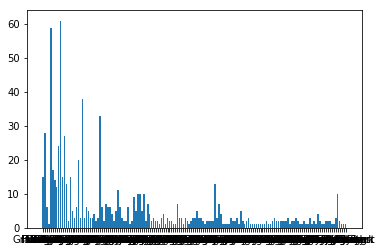

In [5]:
print('The type of Pokemons (one Pokemon may have two or one type).')
firsttype = pd_data['Type 1']
secondtype = pd_data['Type 2']
wholetype={}
for i in range(0, len(firsttype)):
    typekind = str(firsttype[i])+str(secondtype[i])
    if typekind in wholetype:
        wholetype[typekind]+=1
    else:
        wholetype[typekind]=1
typeX=[]
typeY=[]
for i in wholetype:
    typeX.append(i)
for i in wholetype:
    typeY.append(wholetype[i])

plt.bar(typeX, typeY)

print('\n<<   WE FIND   >>')
print('The most common type of Pokemon is ', end='')
print(typeX[typeY.index(max(typeY))]+'.')
print('It exist '+ str(max(typeY)) +' '+ typeX[typeY.index(max(typeY))]+'Pokemons.')
print('\nThe following is the Type Chart.')

Every Pokemon has its special HP, Attack, Defense, Sp.Atk, Sp.Def, and Speed.
I want to figure out the relation between these six features.


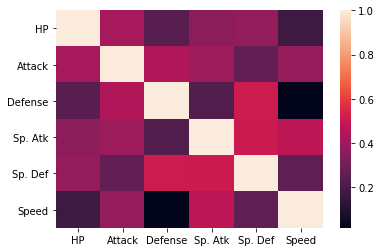

In [6]:
print('Every Pokemon has its special HP, Attack, Defense, Sp.Atk, Sp.Def, and Speed.')
print('I want to figure out the relation between these six features.')
del pd_data['Legendary']
del pd_data['Generation']
del pd_data['#']
del pd_data['Total']
sns.heatmap(pd_data.corr())

There are three type of Pokemons I guess may have high speed.
1.Dragon    2.Flying    3.Bug
Lets figure out whose speed is the fastest




<BarContainer object of 3 artists>

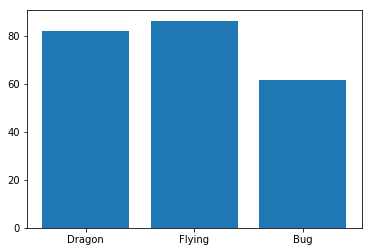

In [7]:
print('There are three type of Pokemons I guess may have high speed.')
print('1.Dragon    2.Flying    3.Bug')
print('Lets figure out whose speed is the fastest\n\n')
dragon=[]
flying=[]
bug=[]
sp = pd_data['Speed']
for i in range(0, len(firsttype)):
    if(firsttype[i] == 'Dragon'):
        dragon.append(sp[i])
    elif(firsttype[i] == 'Flying'):
        flying.append(sp[i])
    elif(firsttype[i] == 'Bug'):
        bug.append(sp[i])
        
    if(secondtype[i] == 'Dragon'):
        dragon.append(sp[i])
    elif(secondtype[i] == 'Flying'):
        flying.append(sp[i])
    elif(secondtype[i] == 'Bug'):
        bug.append(sp[i])
sp_x = ['Dragon', 'Flying', 'Bug']
sp_y=[(sum(dragon)/len(dragon)), (sum(flying)/len(flying)), (sum(bug)/len(bug))]
plt.bar(sp_x, sp_y)